In [1]:
import sxsc_tushare as sx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import *
from numpy.linalg import multi_dot
sx.set_token("0a3191104cd108eccc6d1d4ce8a431f8d99fb786926e5d788f3b55c5")#因为这个账号是私有的 所以老师我无法把真实通行token给到你
pro = sx.get_api(env="prd")

In [2]:
df = pro.daily( ts_code = ' 600298.SH, 600872.SH, 600186.SH', start_date='20041231', end_date='20241231', )
df.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600872.SH,20241231,22.90,22.95,21.97,22.02,22.88,-0.86,-3.7587,128218.61,286369.862
1,600298.SH,20241231,36.26,36.57,36.05,36.05,36.26,-0.21,-0.5792,46909.80,170140.988
2,600186.SH,20241231,5.02,5.70,4.92,5.70,5.18,0.52,10.0386,2546273.82,1386903.837
3,600186.SH,20241230,5.39,5.39,5.11,5.18,4.90,0.28,5.7143,1863664.92,980407.231
4,600298.SH,20241230,36.32,36.71,36.10,36.26,36.37,-0.11,-0.3024,41062.20,149470.040
5,600872.SH,20241230,23.27,23.36,22.75,22.88,23.26,-0.38,-1.6337,113979.32,261826.508
6,600872.SH,20241227,23.31,23.43,22.98,23.26,23.27,-0.01,-0.0430,87356.00,202761.922
7,600298.SH,20241227,35.90,36.55,35.83,36.37,35.97,0.40,1.1120,43404.66,157068.130
8,600186.SH,20241227,4.83,5.01,4.75,4.90,4.78,0.12,2.5105,529206.00,259854.243
9,600186.SH,20241226,4.70,4.84,4.67,4.78,4.74,0.04,0.8439,366488.89,175079.632


In [3]:
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
# df = df.sort_values('trade_date' )ascending = True
df = df.sort_values('trade_date', ascending=True)

In [4]:
df_filtered = df[['ts_code', 'trade_date', 'close']]

In [5]:
df_filtered


,ts_code,trade_date,close
5999,600186.SH,2016-10-11,5.50
5996,600298.SH,2016-10-12,16.92
5998,600186.SH,2016-10-12,5.46
5997,600872.SH,2016-10-12,14.99
5993,600186.SH,2016-10-13,5.53
...,...,...,...
4,600298.SH,2024-12-30,36.26
3,600186.SH,2024-12-30,5.18
2,600186.SH,2024-12-31,5.70
1,600298.SH,2024-12-31,36.05


In [6]:
df_pivot = df_filtered.pivot(
    index='trade_date',   # 行索引为日期
    columns='ts_code',    # 列索引为股票代码
    values='close'        # 填充值为收盘价
)


In [7]:
df_pivot 

ts_code,600186.SH,600298.SH,600872.SH
trade_date,,,
2016-10-11,5.50,NaN,NaN
2016-10-12,5.46,16.92,14.99
2016-10-13,5.53,17.05,14.98
2016-10-14,5.52,16.96,15.69
2016-10-17,5.41,17.30,15.44
...,...,...,...
2024-12-25,4.74,35.44,23.12
2024-12-26,4.78,35.97,23.27
2024-12-27,4.90,36.37,23.26


In [8]:
# 填充空缺值
df_filled = df_pivot.fillna(method='bfill', axis=0)
df_filled
df11 = df_filled
df11



C:\Users\perco\AppData\Local\Temp\ipykernel_35140\3583360789.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_pivot.fillna(method='bfill', axis=0)


ts_code,600186.SH,600298.SH,600872.SH
trade_date,,,
2016-10-11,5.50,16.92,14.99
2016-10-12,5.46,16.92,14.99
2016-10-13,5.53,17.05,14.98
2016-10-14,5.52,16.96,15.69
2016-10-17,5.41,17.30,15.44
...,...,...,...
2024-12-25,4.74,35.44,23.12
2024-12-26,4.78,35.97,23.27
2024-12-27,4.90,36.37,23.26


  0%|          | 0/10000 [00:00<?, ?it/s]D:\anaconda\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
  0%|          | 0/10000 [00:00<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)

In [9]:
最大值
max_values = df_pivot.max()
print(max_values)

ts_code
600186.SH     7.89
600298.SH    70.10
600872.SH    82.85
dtype: float64


In [10]:
# 最小值
min_values = df_pivot.min()
print(min_values)

ts_code
600186.SH     1.26
600298.SH    16.72
600872.SH    13.63
dtype: float64


In [11]:
# 平均值
mean_value = df_pivot.mean()
print(mean_value)

ts_code
600186.SH     3.163128
600298.SH    36.822664
600872.SH    33.943588
dtype: float64


In [12]:
# 标准差
std_close1 = df_pivot['600186.SH'].std()
std_close2 = df_pivot['600298.SH'].std()
std_close3 = df_pivot['600872.SH'].std()

In [13]:
print(
    std_close1,
    std_close2, 
    std_close3,
)

1.1537021789335897 11.665765022120251 13.263548635954903


In [14]:
# 以上面数据为基础吗如何计算偏度和峰度
skewness = df_pivot.skew()
skewness

ts_code
600186.SH    1.229465
600298.SH    0.629262
600872.SH    1.077844
dtype: float64

In [15]:
kurtosis = df_pivot.kurtosis()
kurtosis 

ts_code
600186.SH    1.440419
600298.SH   -0.212280
600872.SH    1.158567
dtype: float64

In [16]:
# 协方差矩阵
corr_matrix = df_pivot.corr()
corr_matrix

ts_code,600186.SH,600298.SH,600872.SH
ts_code,,,
600186.SH,1.000000,-0.240903,-0.388558
600298.SH,-0.240903,1.000000,0.722126
600872.SH,-0.388558,0.722126,1.000000


In [17]:
df_filled


ts_code,600186.SH,600298.SH,600872.SH
trade_date,,,
2016-10-11,5.50,16.92,14.99
2016-10-12,5.46,16.92,14.99
2016-10-13,5.53,17.05,14.98
2016-10-14,5.52,16.96,15.69
2016-10-17,5.41,17.30,15.44
...,...,...,...
2024-12-25,4.74,35.44,23.12
2024-12-26,4.78,35.97,23.27
2024-12-27,4.90,36.37,23.26


In [18]:
# combined_df['dailygainHSI5'] = combined_df['close_x'].pct_change(5)
df_filled['gain1'] = df_filled['600186.SH'].pct_change(5)
df_filled['gain2'] = df_filled['600298.SH'].pct_change(5)
df_filled['gain3'] = df_filled['600872.SH'].pct_change(5)
df_filled['voliti1'] = df_filled['600186.SH'].rolling(5).std()
df_filled['voliti2'] = df_filled['600298.SH'].rolling(5).std()
df_filled['voliti3'] = df_filled['600872.SH'].rolling(5).std()
df_filled

ts_code,600186.SH,600298.SH,600872.SH,gain1,gain2,gain3,voliti1,voliti2,voliti3
trade_date,,,,,,,,,
2016-10-11,5.50,16.92,14.99,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-12,5.46,16.92,14.99,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-13,5.53,17.05,14.98,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-14,5.52,16.96,15.69,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-17,5.41,17.30,15.44,NaN,NaN,NaN,0.049295,0.160000,0.328892
...,...,...,...,...,...,...,...,...,...
2024-12-25,4.74,35.44,23.12,-0.122222,-0.043713,-0.021997,0.238851,0.335067,0.259769
2024-12-26,4.78,35.97,23.27,-0.096408,-0.008818,-0.018143,0.218792,0.225455,0.222306
2024-12-27,4.90,36.37,23.26,-0.073724,0.013657,-0.018565,0.107703,0.373524,0.113578


Text(0, 0.5, 'volatility')

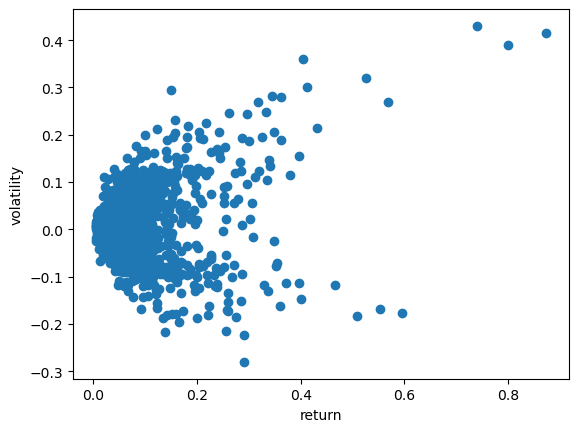

In [19]:
# 有效前沿
ax1 = plt.subplot()
ax1.scatter(df_filled['voliti1'],df_filled['gain1'])
ax1.set_xlabel('return')
ax1.set_ylabel('volatility')

Text(0, 0.5, 'volatility')

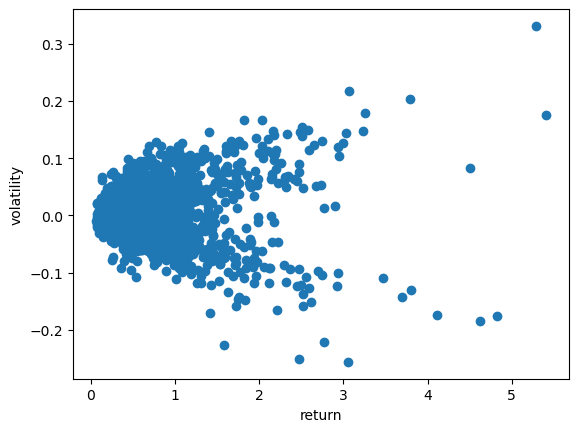

In [20]:
ax1 = plt.subplot()
ax1.scatter(df_filled['voliti2'],df_filled['gain2'])
ax1.set_xlabel('return')
ax1.set_ylabel('volatility')

Text(0, 0.5, 'volatility')

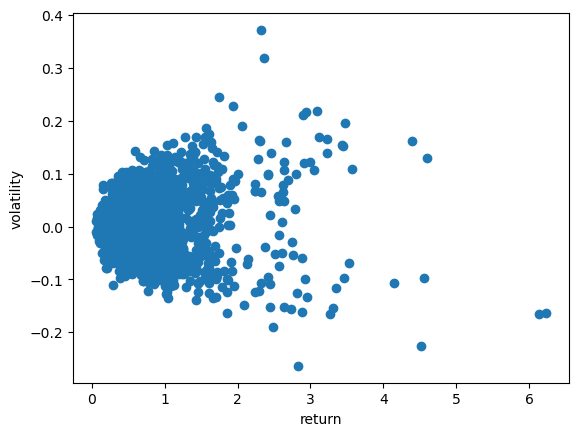

In [21]:
ax1 = plt.subplot()
ax1.scatter(df_filled['voliti3'],df_filled['gain3'])
ax1.set_xlabel('return')
ax1.set_ylabel('volatility')

In [22]:

returns = (df11/df11.shift(1)).dropna()

returns.shape

(1992, 9)

In [25]:
# 组合的股票构成
returns = (df11/df11.shift(1)).dropna()

returns.shape
symbols = ['600186.SH','600298.SH','600872.SH']
numofasset = len(symbols)
 
# 定义一个组合的函数
def portfolio_simulation(returns):
    rets = []; vols=[]; wts=[]
    
    # 模拟10000次3只股票不同权重的组合
    for i in tqdm(range(10000)):
        # 产生随机权重
        weights = np.random.random(numofasset)[:, np.newaxis]
        weights = weights/weights.sum()
        
        # 记录组合的收益、波动、权重
        rets.append(weights.T @ np.array(returns.mean()*250)[:,np.newaxis])
        vols.append(np.sqrt(multi_dot([weights.T, returns.cov()*250, weights])))
        wts.append(weights.flatten())
        
    # 记录组合各数据
    portdf = 100 * pd.DataFrame({
        'port_rets': array(rets).flatten(),
        'port_vols': array(vols).flatten(),
        'weights': list(array(wts))
        })
    portdf['Sharp_ratio']=portdf['port_rets']/portdf['port_vols']  #假设rf为0
    
    return round(portdf, 2)

temp = portfolio_simulation(returns)
temp.head(10)

In [24]:

temp = portfolio_simulation(returns)
temp.head(10)

  0%|          | 0/10000 [00:00<?, ?it/s]D:\anaconda\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
  0%|          | 0/10000 [00:00<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)

In [ ]:
# # 组合有效前沿

# symbols = ['600186.SH','600298.SH','600872.SH']



# def portfolio_simulation(returns, n_samples=10000):
#     rets, vols, wts = [], [], []
#     n_assets = returns.shape[1]  # 动态获取资产列数[1](@ref)
    
#     # 生成权重矩阵并归一化
#     weights = np.random.rand(n_samples, n_assets)
#     weights = weights / weights.sum(axis=1, keepdims=True)
    
#     # 预计算年化参数
#     mean_returns = returns.mean().values.reshape(-1, 1) * 250  # 列向量 (3,1)
#     cov_matrix = returns.cov().values * 250  # 协方差矩阵 (3,3)[3](@ref)
    
#     for i in range(n_samples):
#         w = weights[i].reshape(1, -1)  # 权重行向量 (1,3)
        
#         # 计算收益和波动率
#         ret = (w @ mean_returns).item()  # 标量化[5](@ref)
#         vol = np.sqrt(w @ cov_matrix @ w.T).item()
        
#         rets.append(ret)
#         vols.append(vol)
#         wts.append(weights[i].tolist())
    
#     # 构建DataFrame
#     portdf = pd.DataFrame({
#         'port_rets': rets,
#         'port_vols': vols,
#         'weights': wts
#     })
#     portdf['Sharp_ratio'] = (portdf['port_rets'] - 0.02) / portdf['port_vols']  # 无风险利率2%
#     return round(portdf, 2)

In [ ]:
returns = da[symbols]  # 确保输入数据是包含3列的DataFrame
print(returns.shape)    # 应输出 (样本数,3)

In [ ]:
print("权重矩阵示例:", wts[0].sum())  # 应输出1.0